공분산: -48.53
상관계수: -0.90
P-value: 0.0003
                            OLS Regression Results                            
Dep. Variable:               bir_rate   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     35.77
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           0.000330
Time:                        09:14:00   Log-Likelihood:                -25.738
No. Observations:                  10   AIC:                             55.48
Df Residuals:                       8   BIC:                             56.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


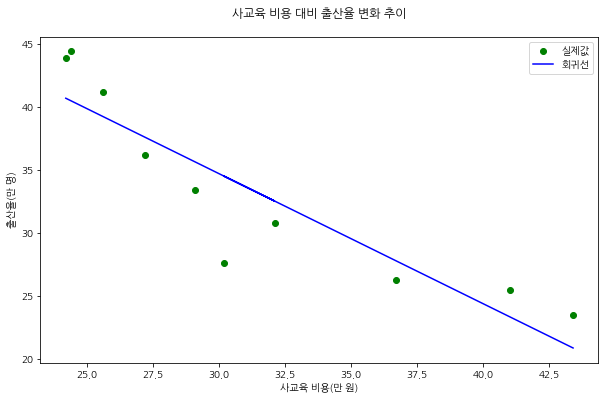

1.8118839761882553e-14


In [1]:
# 사교육 비용 대비 출산율 변동 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.linear_model import LinearRegression

data2 = {
    'pri_edu': [24.2, 24.4, 25.6, 27.2, 29.1, 32.1, 30.2, 36.7, 41.0, 43.4],  # 사교육비 (단위: 만원)
    'bir_rate': [43.9, 44.4, 41.2, 36.2, 33.4, 30.8, 27.6, 26.3, 25.5, 23.5]   # 출생율 (단위: 만명)
}

df2 = pd.DataFrame(data2)

x= df2['pri_edu']
y = df2['bir_rate']

# 상관계수, 공분산 - 두 변수 상관 정도 + p-value
print('공분산: {:.2f}'.format(np.cov(x,y)[0,1])) # -48.53

print('상관계수: {:.2f}'.format(stats.pearsonr(x,y)[0])) # -0.9

# -1 < (상관계수) < 1 
# => 1에 가까울 수록 강한 양의 상관관계
# => -1에 가까울 수록 강한 음의 상관관계
print('P-value: {:.4f}'.format(stats.pearsonr(x,y)[1])) # 0.0003

# 가설 검증

x2= sm.add_constant(x)      # 절편 만들기 

m2 = sm.OLS(y, x2).fit()

print(m2.summary())

# 한글 폰트
font_path='NanumGothic.ttf' 
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name) 

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(df2['pri_edu'], df2['bir_rate'], color='green', label='실제값')

plt.plot(df2['pri_edu'], m2.fittedvalues, color='blue', label='회귀선')
plt.xlabel('사교육 비용(만 원)')
plt.ylabel('출산율(만 명)')
plt.title('사교육 비용 대비 출산율 변화 추이', pad=20)
plt.legend()
plt.savefig('사교육 대비 출산율 변화 추이.jpg')
plt.show()

# 사교육 비용이 1만원이 오를수록, 출산 정도가 약 1만명씩 감소한다
# 사교육 비용과 출산율 간 상관성은 -0.90 로 강한 음의 상관성을 띈다
# p-value는 0.0003 으로 유의미하기 때문에 영가설 기각, 대립가설 채택
# 결정계수(R-Squared) : 0.817 => 회귀식 신뢰도↑

# 잔차의 평균

residuals = y - m2.fittedvalues
print(residuals.mean()) 

# 1.8118839761882553e-14
